In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
dataset = load_breast_cancer()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


X = dataset.data  # Features
y = dataset.target  # Target variable

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000)
}

# Dictionary to store accuracy scores for each classifier
accuracy_scores = {name: [] for name in classifiers.keys()}

# Prepare data for cross-validation and train each classifier
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)  # Train the classifier
        y_pred = clf.predict(X_test)  # Make predictions
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        accuracy_scores[name].append(accuracy)  # Store the accuracy score

# Print the average accuracy for each classifier
for name, scores in accuracy_scores.items():
    print(f"{name}: Average Accuracy = {np.mean(scores):.4f}")


Decision Tree: Average Accuracy = 0.9350
Random Forest: Average Accuracy = 0.9596
Logistic Regression: Average Accuracy = 0.9507
Support Vector Machine: Average Accuracy = 0.9173
Multi-layer Perceptron: Average Accuracy = 0.9384


**Random Forest** is the best model for this dataset, achieving the highest accuracy and demonstrating the power of ensemble methods.

### Key Issues to Monitor During Training

1. **Overfitting**
   - **Watch:** High training accuracy, low test accuracy.
   - **Solutions:** Regularization, early stopping.

2. **Underfitting**
   - **Watch:** Low training/test accuracy.
   - **Solutions:** Increase model complexity.

3. **Class Imbalance**
   - **Watch:** Skewed class distribution.
   - **Solutions:** Oversample/undersample, use F1/recall.

4. **Feature Scaling**
   - **Watch:** Sensitivity to feature scale.
   - **Solutions:** Normalize/standardize features.

5. **Hyperparameter Tuning**
   - **Watch:** Suboptimal performance.
   - **Solutions:** Grid Search, Random Search.

6. **Evaluation Metrics**
   - **Watch:** Reliance on accuracy alone.
   - **Solutions:** Use precision, recall, F1 score.

7. **Cross-Validation**
   - **Watch:** Performance variability.
   - **Solutions:** Use K-Fold.

8. **Feature Importance**
   - **Watch:** Unimportant features.
   - **Solutions:** Analyze and select features.

9. **Data Quality**
   - **Watch:** Missing values/outliers.
   - **Solutions:** Clean and preprocess data.

10. **Reproducibility**
    - **Watch:** Inconsistent results.
    - **Solutions:** Set random seeds, document processes.



In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch the Ionosphere dataset
ionosphere = fetch_ucirepo(id=52)

# Data (as pandas DataFrames)
X = ionosphere.data.features
y = ionosphere.data.targets


# Convert target variable: 'g' to 1 and 'b' to 0
y = (y == 'g').astype(int)

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000)
}

# Dictionary to store accuracy scores
accuracy_scores = {name: [] for name in classifiers.keys()}

# Cross-validation and training
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use .iloc with DataFrame
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)  # Train the classifier
        y_pred = clf.predict(X_test)  # Make predictions
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        accuracy_scores[name].append(accuracy)  # Store accuracy score

# Print average accuracy for each classifier
for name, scores in accuracy_scores.items():
    print(f"{name}: Average Accuracy = {np.mean(scores):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

Decision Tree: Average Accuracy = 0.8975
Random Forest: Average Accuracy = 0.9373
Logistic Regression: Average Accuracy = 0.8775
Support Vector Machine: Average Accuracy = 0.9345
Multi-layer Perceptron: Average Accuracy = 0.9146


- **Best Performing Model:** Random Forest (0.9373) has the best average accuracy, suggesting it is the most reliable choice for this dataset.
- **Competitors:** SVM (0.9345) is close in performance to Random Forest, indicating it is also a strong candidate.
- **Moderate Performance:** The Multi-layer Perceptron (0.9146) performs well but requires more tuning compared to tree-based methods.
- **Lower Performance:** Decision Tree (0.8975) and Logistic Regression (0.8775) demonstrate that simpler models may not capture the complexity of the dataset as effectively.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('space.csv')

# Separate features and target variable
X = df[['x', 'y']]
y = df['label']

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Support Vector Machine': SVC(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000)
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train each model and evaluate its accuracy
for name, clf in classifiers.items():
    clf.fit(X, y)  # Train the classifier
    y_pred = clf.predict(X)  # Make predictions on the same dataset
    accuracy = accuracy_score(y, y_pred)  # Calculate accuracy
    accuracy_scores[name] = accuracy  # Store accuracy score

# Print accuracy for each classifier
for name, accuracy in accuracy_scores.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")


Decision Tree: Accuracy = 1.0000
Random Forest: Accuracy = 1.0000
Logistic Regression: Accuracy = 0.5568
Support Vector Machine: Accuracy = 0.9811
Multi-layer Perceptron: Accuracy = 0.9922


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("blue", "red", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl].iloc[:, 0],
                    y=X[y == cl].iloc[:, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


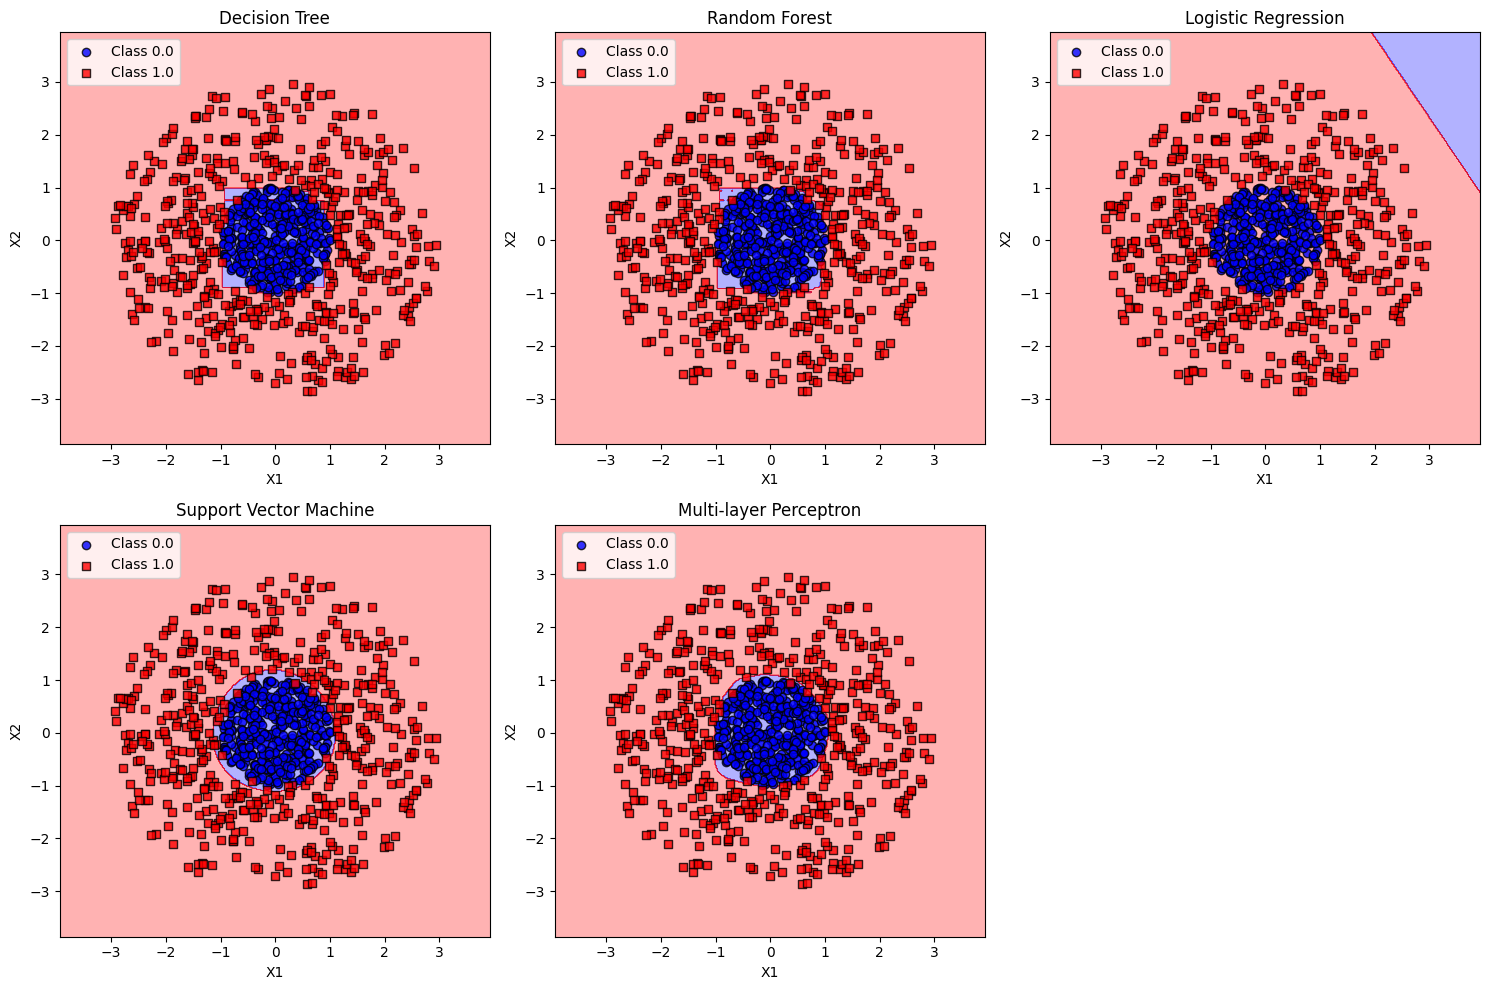

In [ ]:
# Train classifiers
for name, clf in classifiers.items():
    clf.fit(X, y)

# Create a plot for each classifier
plt.figure(figsize=(15, 10))

for i, (name, clf) in enumerate(classifiers.items(), start=1):
    plt.subplot(2, 3, i)  # Create a grid of 2 rows and 3 columns
    plot_decision_regions(X, y, classifier=clf)
    plt.title(name)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


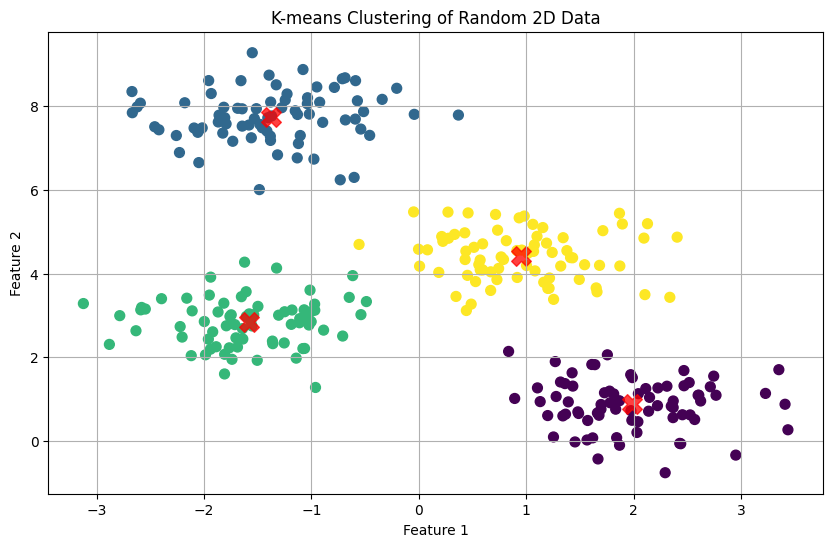

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate random 2D data distribution
n_samples = 300
n_clusters = 4
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.60, random_state=0)
print(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters and their centroids
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')  # Cluster points
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Centroids
plt.title('K-means Clustering of Random 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


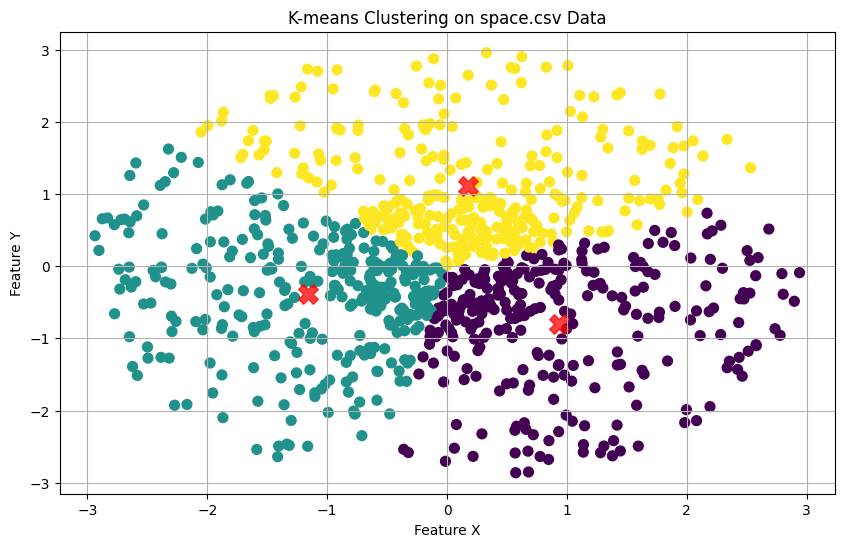

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('space.csv')

# Separate features
X = df[['x', 'y']]

# Apply K-means clustering
n_clusters = 3  # Set the number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters and their centroids
plt.figure(figsize=(10, 6))
plt.scatter(X['x'], X['y'], c=y_kmeans, s=50, cmap='viridis')  # Cluster points
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Centroids
plt.title('K-means Clustering on space.csv Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid(True)
plt.show()
